Unsupervised learning is one of the major learning paradigms in machine learning and it enables us to understand the patterns and relationships in the data without the guidance of ground truths in the data. Although many of the recent breakthroughs in machine learning in the previous decades came from the supervised learning front, unsupervised learning remains one of the most promising directions that the current data science and artificial intelligence can make use of. Although, we're living in a world with abundant amounts of data, labeling them with the ground truths is not an easy task as many times this requires costly and challenging human labor to annotate them. Unsupervised learning is of primary importance for data science as it has the potential to exploit enormous amounts of data without any need for annotation.

## Challenge
Throughout this module, we introduced the amazing and yet challenging domain of unsupervised learning by covering some of the most popular clustering and dimensionality reduction algorithms. Now, it's time for you to apply your unsupervised learning knowledge. In this challenge, you'll work with a dataset of your choice. As always, Kaggle is one of your best friends. You can spend some time on Kaggle and pick a beautiful dataset. Using this dataset:

Apply dimensionality reduction techniques to visualize the observations.
Apply clustering techniques to group together similar observations.
In each of the tasks above, try alternative methods and select a best performing one. Discuss how dimensionality reduction and clustering algorithms enable you to gain insights regarding the data.

In [146]:
# Set up & handling the data
import os
os.chdir('/Users/sophiaperides/Desktop/Thinkful')
import csv
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action="ignore")

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn import datasets, metrics

import time

import seaborn as sns

In [98]:
cc = pd.read_csv('CervicalCancer.csv')
cc = pd.DataFrame(cc)
print(cc.columns)
print('\n', cc.describe())
cc.info()

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

               Age  STDs: Number of diagnosis   Dx:Cancer      Dx:CIN  \
count  858.000000                 858.000000  858.000000  858.000000   
mean    26.820513          

While at first glance it appears that there are no missing values, I know from Kaggle that 12% of the cells are filled with a question mark. These cells will be filled with the mean of the respective column if not further discussed.

Columns STDs: Time since first diagnosis and STDs: Time since last diagnosis are missing 92% of values, so I will likely remove these variables. 

In [99]:
cc.replace('?', np.nan, inplace=True)
cc.info()
cc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null object
First sexual intercourse              851 non-null object
Num of pregnancies                    802 non-null object
Smokes                                845 non-null object
Smokes (years)                        845 non-null object
Smokes (packs/year)                   845 non-null object
Hormonal Contraceptives               750 non-null object
Hormonal Contraceptives (years)       750 non-null object
IUD                                   741 non-null object
IUD (years)                           741 non-null object
STDs                                  753 non-null object
STDs (number)                         753 non-null object
STDs:condylomatosis                   753 non-null object
STDs:cervical condylomatosis          753 non-null object
STDs:vaginal condylomatosi

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0


In [81]:
cc['Number of sexual partners'].fillna(cc['Number of sexual partners'].astype(float).mean(), inplace=True)
cc['First sexual intercourse'].fillna(cc['First sexual intercourse'].astype(float).mean(), inplace=True)
cc['Num of pregnancies'].fillna(cc['Num of pregnancies'].astype(float).mean(), inplace=True)
cc['Smokes (years)'].fillna(cc['Smokes (years)'].astype(float).mean(), inplace=True)
cc['Smokes (packs/year)'].fillna(cc['Smokes (packs/year)'].astype(float).mean(), inplace=True)


In [65]:
cc['STDs'].astype(float)

cc.loc[(cc['STDs'] == 0),'STDs: Time since first diagnosis'] = 100
cc.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1,16.9953,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0


In [84]:
no_smokes = cc.loc[cc['Smokes'] == None]
no_smokes

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy


In [69]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                845 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               750 non-null object
Hormonal Contraceptives (years)       750 non-null object
IUD                                   741 non-null object
IUD (years)                           741 non-null object
STDs                                  753 non-null object
STDs (number)                         753 non-null object
STDs:condylomatosis                   753 non-null object
STDs:cervical condylomatosis          753 non-null object
STDs:vaginal condylomatosi

In [44]:
cc['Hormonal Contraceptives'].value_counts(dropna=False)

1      481
0      269
NaN    108
Name: Hormonal Contraceptives, dtype: int64

In [106]:
cc_drop = cc.dropna(thresh=22, axis=0)
cc_drop = cc_drop.drop(columns=['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'])
cc_drop['Number of sexual partners'].fillna(cc_drop['Number of sexual partners'].astype(float).mean(), inplace=True)
cc_drop['First sexual intercourse'].fillna(cc_drop['First sexual intercourse'].astype(float).mean(), inplace=True)
cc_drop['Num of pregnancies'].fillna(cc_drop['Num of pregnancies'].astype(float).mean(), inplace=True)
cc_drop['Smokes'].fillna(0.0, inplace=True)
cc_drop['Smokes (years)'].fillna(cc_drop['Smokes (years)'].astype(float).mean(), inplace=True)
cc_drop['Smokes (packs/year)'].fillna(cc_drop['Smokes (packs/year)'].astype(float).mean(), inplace=True)
cc_drop['Hormonal Contraceptives'].fillna(0.0, inplace=True)
cc_drop['Hormonal Contraceptives (years)'].fillna(0.0, inplace=True)
cc_drop['IUD'].fillna(0.0, inplace=True)
cc_drop['IUD (years)'].fillna(0.0, inplace=True)

cc_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 0 to 857
Data columns (total 34 columns):
Age                                   753 non-null int64
Number of sexual partners             753 non-null object
First sexual intercourse              753 non-null object
Num of pregnancies                    753 non-null object
Smokes                                753 non-null object
Smokes (years)                        753 non-null object
Smokes (packs/year)                   753 non-null object
Hormonal Contraceptives               753 non-null object
Hormonal Contraceptives (years)       753 non-null object
IUD                                   753 non-null object
IUD (years)                           753 non-null object
STDs                                  753 non-null object
STDs (number)                         753 non-null object
STDs:condylomatosis                   753 non-null object
STDs:cervical condylomatosis          753 non-null object
STDs:vaginal condylomatosi

In [134]:
cc_drop = cc_drop.astype(float)

In [144]:
y = cc_drop['Dx:Cancer']
X = cc_drop.drop('Dx:Cancer', axis=1)
X_std = StandardScaler().fit_transform(X)
print(X.shape, y.shape)

(753, 33) (753,)


# Dimensionality Reduction

## PCA

In [136]:
print(cc_drop['Dx:Cancer'].value_counts())

0.0    735
1.0     18
Name: Dx:Cancer, dtype: int64


In [137]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

plt.figure(figsize=(10,5))
colours = ["r","b"]
for i in range(pca_components.shape[0]):
    plt.text(pca_components[i, 0], pca_components[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

KeyError: 71

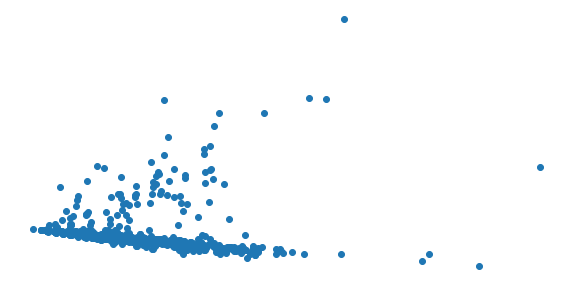

In [138]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## t-SNE

Using a perplexity of 30 gives the most distinguishable clusters.

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 753 samples in 0.001s...
[t-SNE] Computed neighbors for 753 samples in 0.026s...
[t-SNE] Computed conditional probabilities for sample 753 / 753
[t-SNE] Mean sigma: 1.235210
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.780212
[t-SNE] KL divergence after 300 iterations: 1.117805
Cluster Graph with t-SNE with Perplexity  10


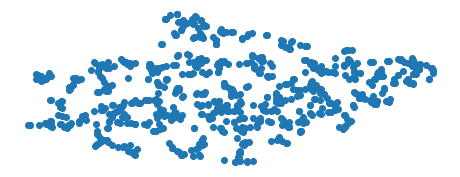

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 753 samples in 0.002s...
[t-SNE] Computed neighbors for 753 samples in 0.031s...
[t-SNE] Computed conditional probabilities for sample 753 / 753
[t-SNE] Mean sigma: 1.571606
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.669754
[t-SNE] KL divergence after 300 iterations: 0.873702
Cluster Graph with t-SNE with Perplexity  20


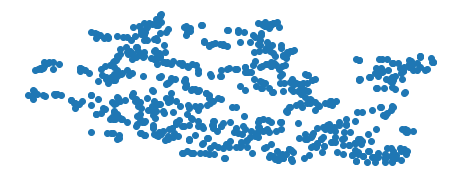

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 753 samples in 0.001s...
[t-SNE] Computed neighbors for 753 samples in 0.043s...
[t-SNE] Computed conditional probabilities for sample 753 / 753
[t-SNE] Mean sigma: 1.794491
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.986187
[t-SNE] KL divergence after 300 iterations: 0.742685
Cluster Graph with t-SNE with Perplexity  30


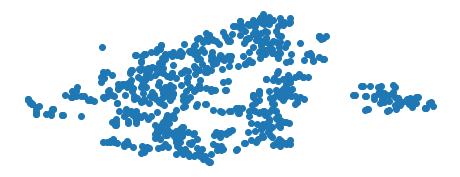

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 753 samples in 0.001s...
[t-SNE] Computed neighbors for 753 samples in 0.043s...
[t-SNE] Computed conditional probabilities for sample 753 / 753
[t-SNE] Mean sigma: 1.981019
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.661671
[t-SNE] KL divergence after 300 iterations: 0.679276
Cluster Graph with t-SNE with Perplexity  40


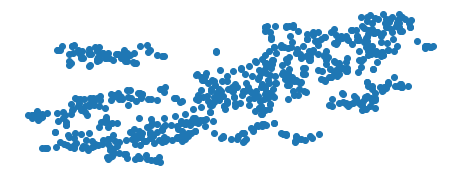

In [185]:
for perplexity in [10, 20, 30, 40]:
    tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=300)
    tsne_results = tsne.fit_transform(X)
    print('Cluster Graph with t-SNE with Perplexity ', perplexity)
    plt.figure(figsize=(8,3))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

In [198]:
len(tsne_results)

753

In [186]:
plt.figure(figsize=(10,5))
colours = ["r","b"]
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

KeyError: 71

## UMAP

UMAP with  5 neighbors and  0.01 minimum distance.


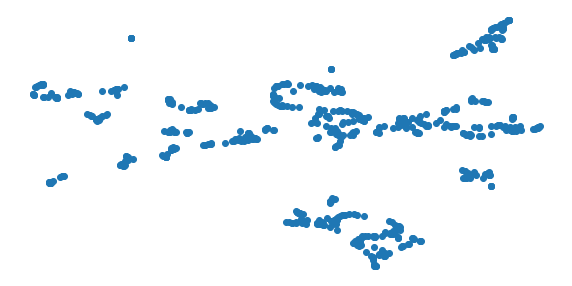



UMAP with  5 neighbors and  0.1 minimum distance.


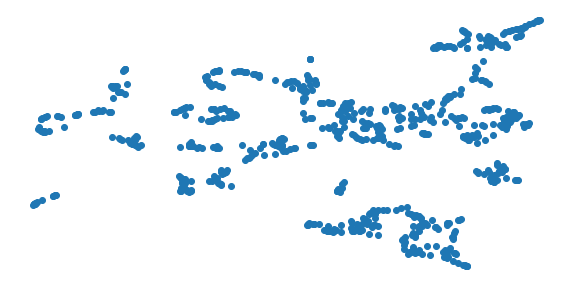



UMAP with  5 neighbors and  0.5 minimum distance.


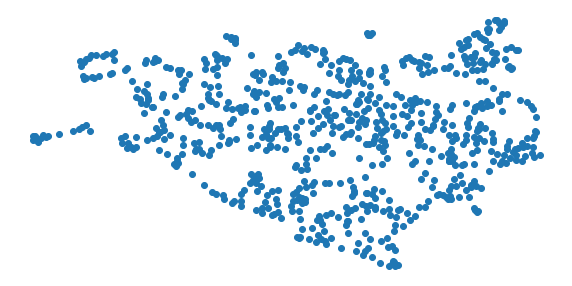



UMAP with  10 neighbors and  0.01 minimum distance.


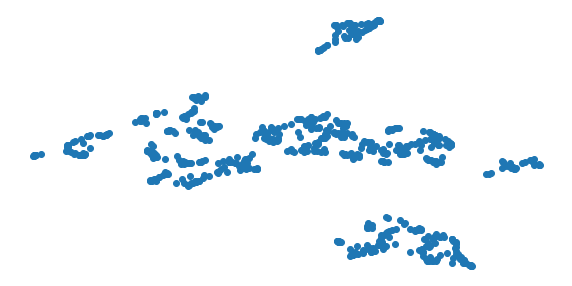



UMAP with  10 neighbors and  0.1 minimum distance.


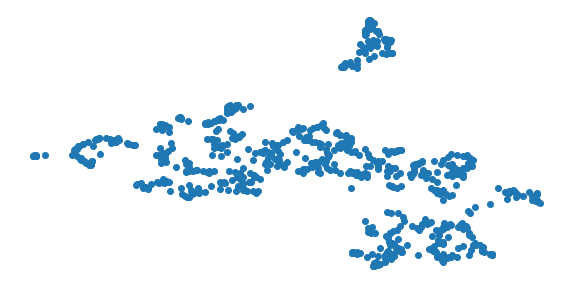



UMAP with  10 neighbors and  0.5 minimum distance.


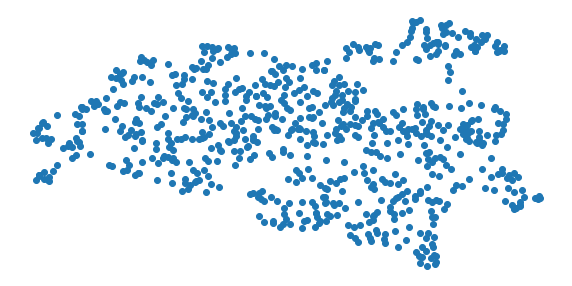



UMAP with  15 neighbors and  0.01 minimum distance.


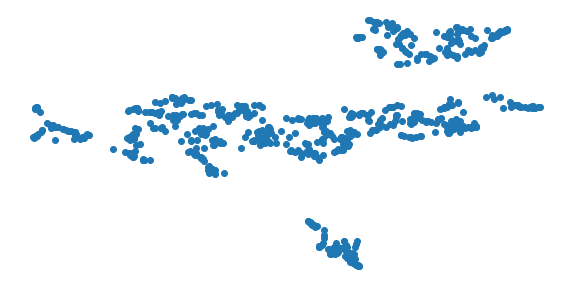



UMAP with  15 neighbors and  0.1 minimum distance.


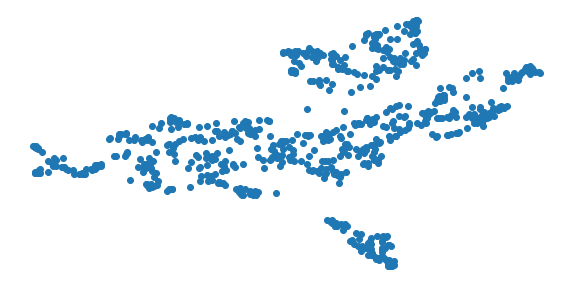



UMAP with  15 neighbors and  0.5 minimum distance.


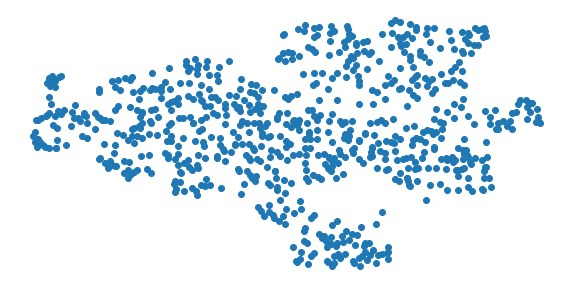



UMAP with  25 neighbors and  0.01 minimum distance.


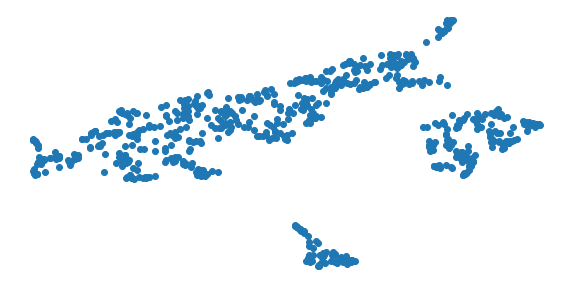



UMAP with  25 neighbors and  0.1 minimum distance.


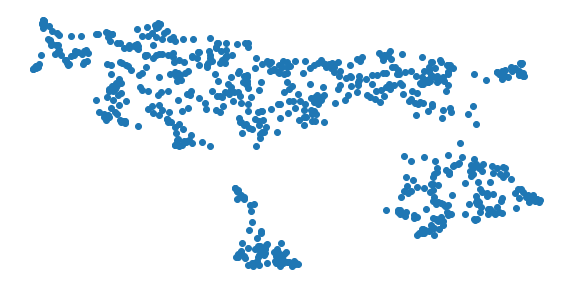



UMAP with  25 neighbors and  0.5 minimum distance.


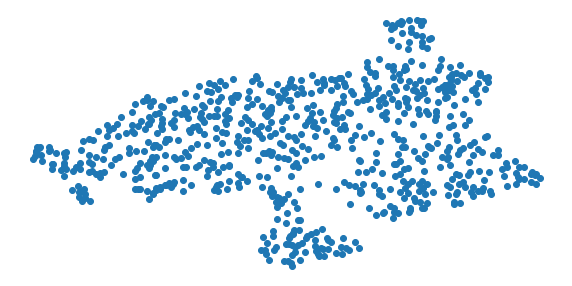

In [202]:
for n_neighbors in [5, 10, 15, 25]:
    for min_dist in [ 0.01, 0.1, 0.5]:
        umap_results = umap.UMAP(n_neighbors=n_neighbors,
                      min_dist=min_dist,
                      metric='correlation').fit_transform(X)
        print('UMAP with ', n_neighbors, 'neighbors and ', min_dist, 'minimum distance.')
        plt.figure(figsize=(10,5))
        plt.scatter(umap_results[:, 0], umap_results[:, 1])
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
        plt.show()
        print('\n')

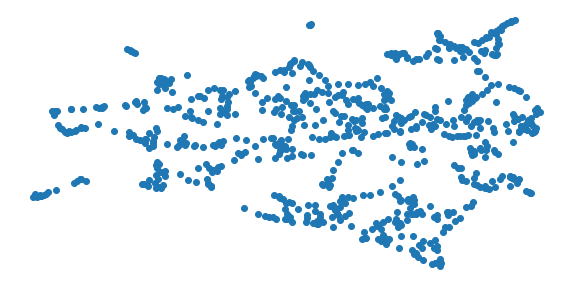

KeyError: 71

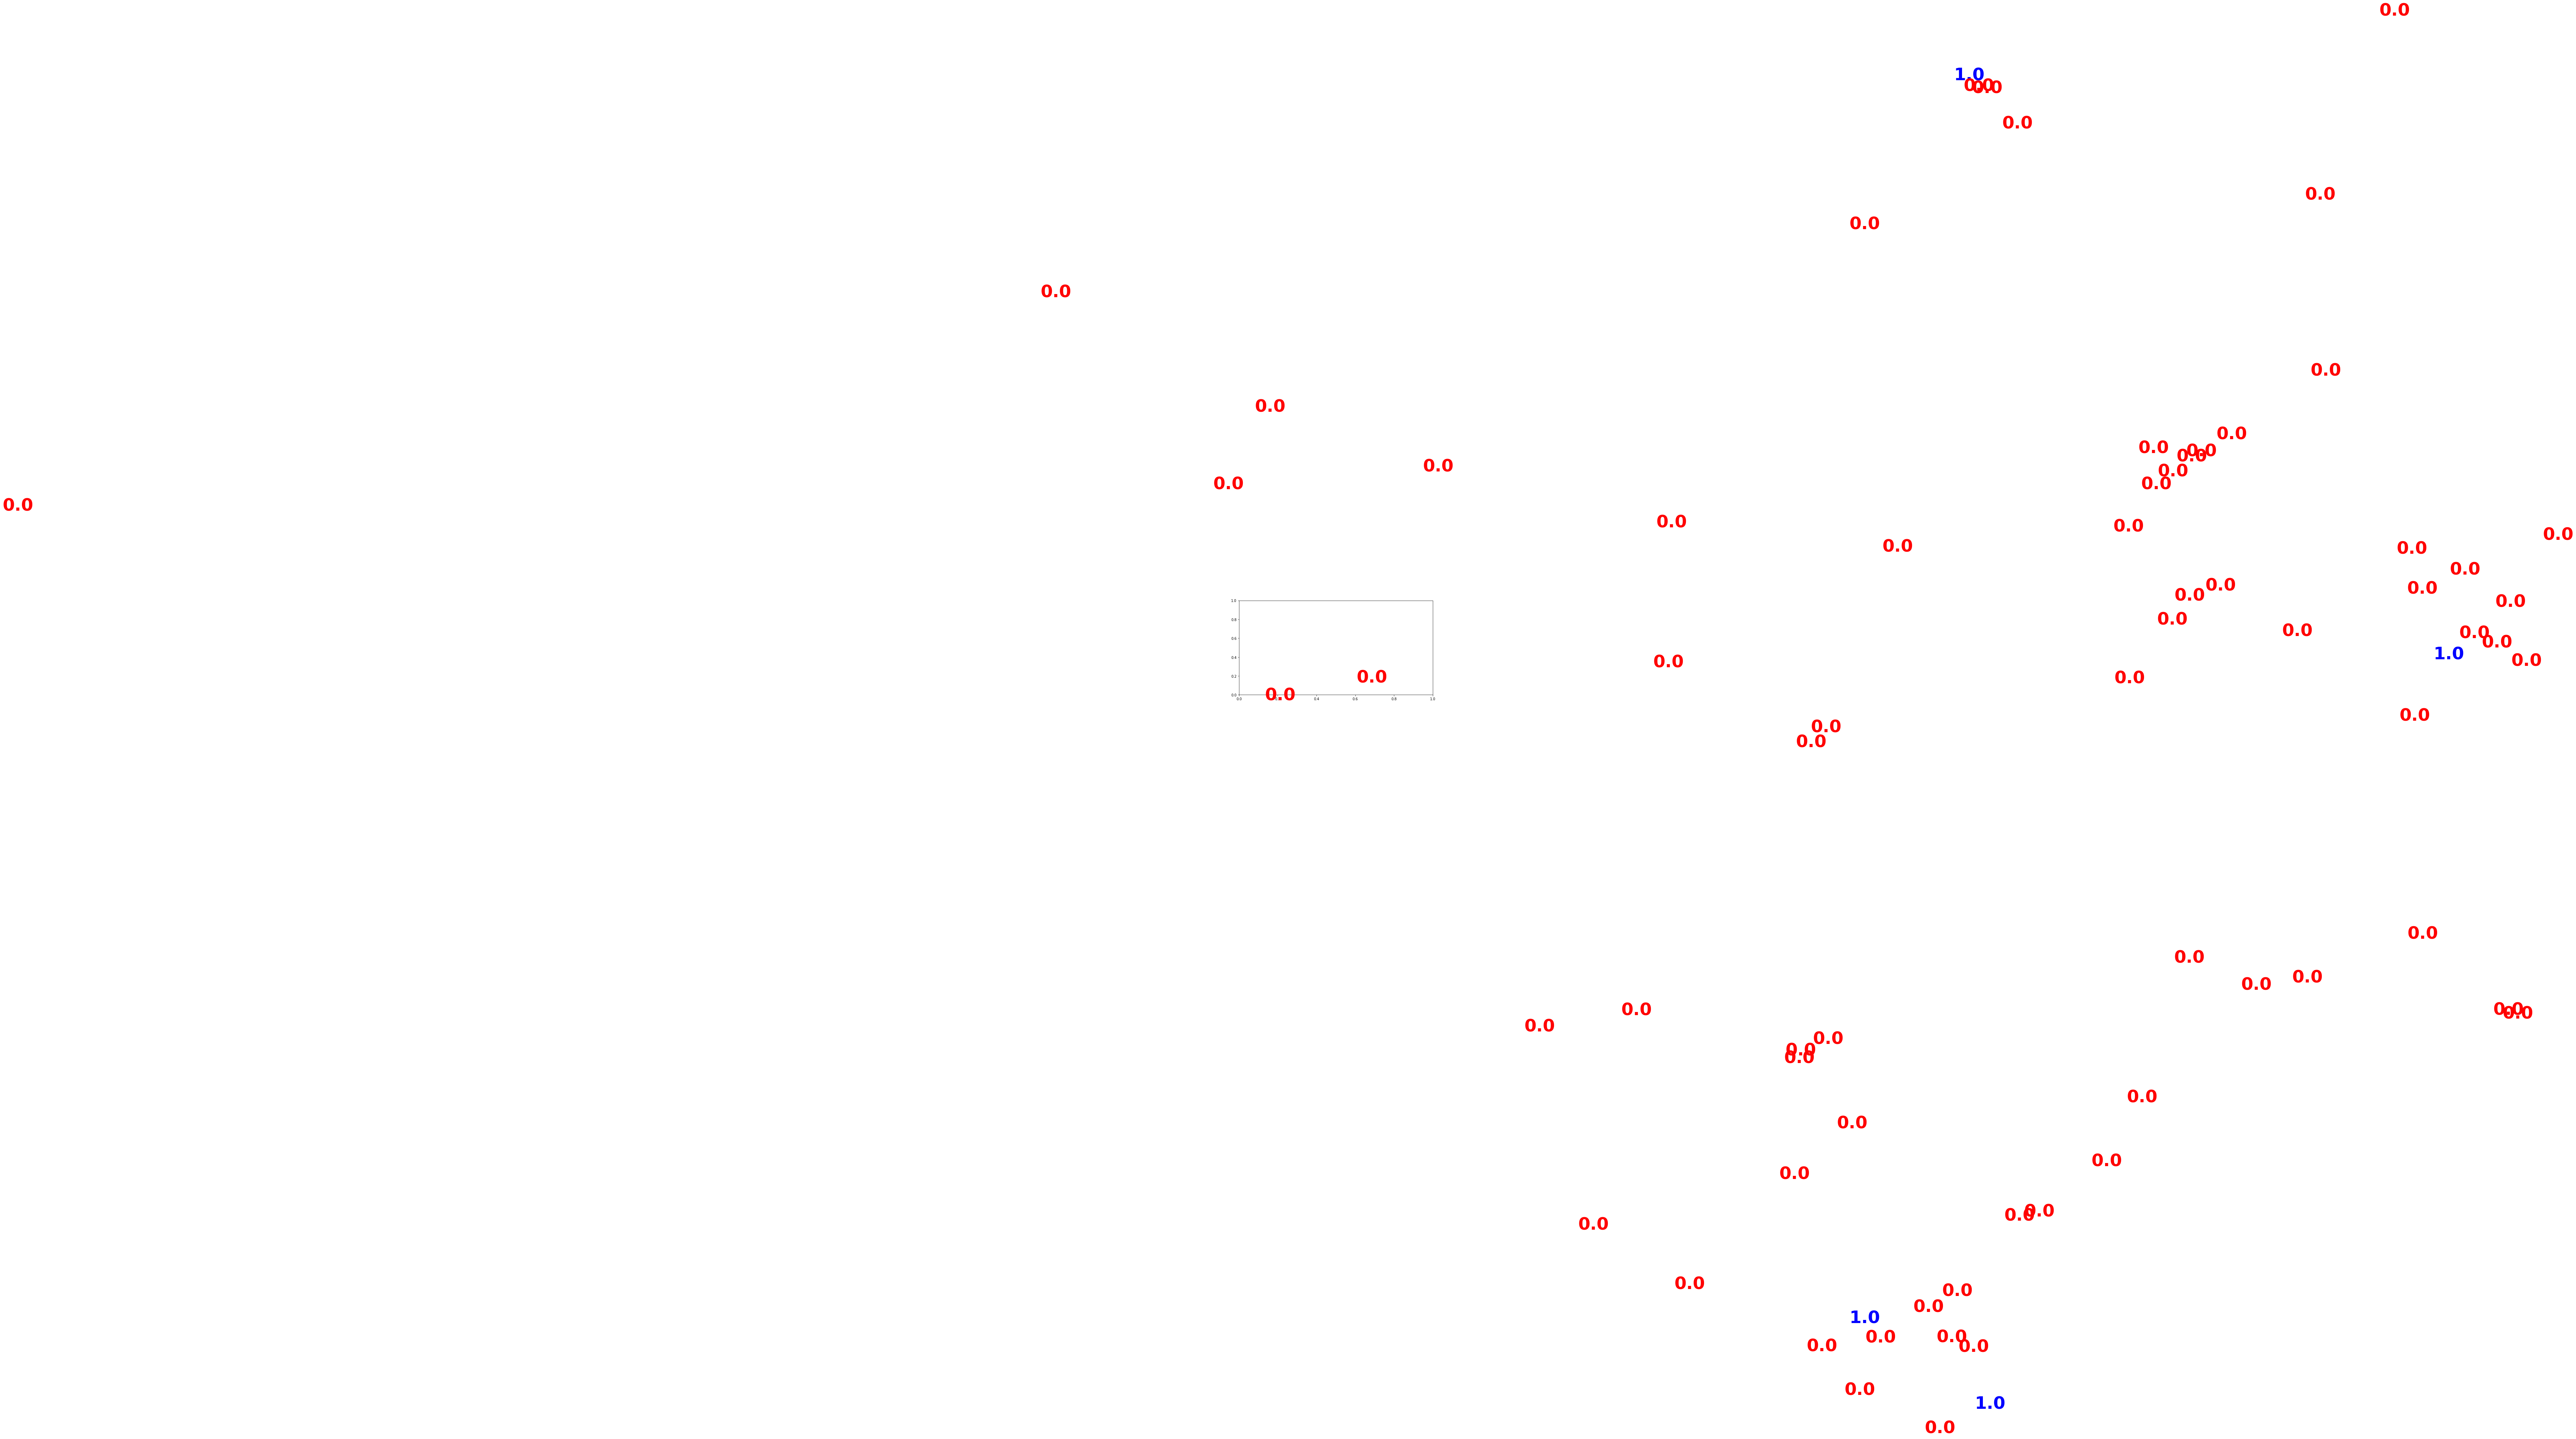

In [140]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], y[i],
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )
    
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

# Clustering 

## K-means with Standardized Variables

In [150]:
labels = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)

print('K-means with two clusters')
kmeans_cluster_2 = KMeans(n_clusters=2, random_state=123)
%timeit kmeans_cluster_2.fit(X_std)
y_pred = kmeans_cluster_2.predict(X_std)
print('ARI Score: ', metrics.adjusted_rand_score(y, y_pred))
print('Silhouette Score: ', metrics.silhouette_score(X_std, labels, metric='euclidean'))
print('\n')

print('K-means with three clusters')
kmeans_cluster_3 = KMeans(n_clusters=3, random_state=123)
%timeit kmeans_cluster_3.fit(X_std)
y_pred = kmeans_cluster_3.predict(X_std)
print('ARI Score: ', metrics.adjusted_rand_score(y, y_pred))
print('Silhouette Score: ', metrics.silhouette_score(X_std, labels, metric='euclidean'))
print('\n')

print('K-means with two clusters')
kmeans_cluster_4 = KMeans(n_clusters=4, random_state=123)
%timeit kmeans_cluster_4.fit(X_std)
y_pred = kmeans_cluster_4.predict(X_std)
print('ARI Score: ', metrics.adjusted_rand_score(y, y_pred))
print('Silhouette Score: ', metrics.silhouette_score(X_std, labels, metric='euclidean'))

K-means with two clusters
30.9 ms ± 1.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
ARI Score:  0.0019486841996139536
Silhouette Score:  0.4588579827224388


K-means with three clusters
58.1 ms ± 216 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
ARI Score:  0.1912168992622387
Silhouette Score:  0.4588579827224388


K-means with two clusters
64.5 ms ± 850 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
ARI Score:  0.10907029344000131
Silhouette Score:  0.4588579827224388


## K-means with PCA Components

In [153]:
labels = KMeans(n_clusters=3, random_state=123).fit_predict(pca_components)

print('K-means with two clusters')
kmeans_cluster_2 = KMeans(n_clusters=2, random_state=123)
%timeit kmeans_cluster_2.fit(pca_components)
y_pred = kmeans_cluster_2.predict(pca_components)
print('ARI Score: ', metrics.adjusted_rand_score(y, y_pred))
print('Silhouette Score: ', metrics.silhouette_score(pca_components, labels, metric='euclidean'))
print('\n')

print('K-means with three clusters')
kmeans_cluster_3 = KMeans(n_clusters=3, random_state=123)
%timeit kmeans_cluster_3.fit(pca_components)
y_pred = kmeans_cluster_3.predict(pca_components)
print('ARI Score: ', metrics.adjusted_rand_score(y, y_pred))
print('Silhouette Score: ', metrics.silhouette_score(pca_components, labels, metric='euclidean'))
print('\n')

print('K-means with two clusters')
kmeans_cluster_4 = KMeans(n_clusters=4, random_state=123)
%timeit kmeans_cluster_4.fit(pca_components)
y_pred = kmeans_cluster_4.predict(pca_components)
print('ARI Score: ', metrics.adjusted_rand_score(y, y_pred))
print('Silhouette Score: ', metrics.silhouette_score(pca_components, labels, metric='euclidean'))

K-means with two clusters
32 ms ± 1.79 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
ARI Score:  0.01346147558517267
Silhouette Score:  0.5542306556499343


K-means with three clusters
40.3 ms ± 8.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
ARI Score:  0.019415331699640753
Silhouette Score:  0.5542306556499343


K-means with two clusters
54.1 ms ± 6.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
ARI Score:  0.014781377756861218
Silhouette Score:  0.5542306556499343


## K-means with t-SNE Components

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
    tsne_results = tsne.fit_transform(X)
    
linkage = ['Ward', 'Complete', 'Average']
n_clusters = [2, 3, 4, 5]

for link in linkage:
    for cluster in n_clusters:
        agg_cluster = AgglomerativeClustering(linkage=linkage, 
                                      affinity='cosine',
                                      n_clusters=n_clusters)
        clusters = agg_cluster.fit_predict(X_std)

print('K-means with two clusters')
kmeans_cluster_2 = KMeans(n_clusters=2, random_state=123)
%timeit kmeans_cluster_2.fit(pca_components)
y_pred = kmeans_cluster_2.predict(pca_components)
print('ARI Score: ', metrics.adjusted_rand_score(y, y_pred))
print('Silhouette Score: ', metrics.silhouette_score(pca_components, labels, metric='euclidean'))
print('\n')

print('K-means with three clusters')
kmeans_cluster_3 = KMeans(n_clusters=3, random_state=123)
%timeit kmeans_cluster_3.fit(pca_components)
y_pred = kmeans_cluster_3.predict(pca_components)
print('ARI Score: ', metrics.adjusted_rand_score(y, y_pred))
print('Silhouette Score: ', metrics.silhouette_score(pca_components, labels, metric='euclidean'))
print('\n')

print('K-means with two clusters')
kmeans_cluster_4 = KMeans(n_clusters=4, random_state=123)
%timeit kmeans_cluster_4.fit(pca_components)
y_pred = kmeans_cluster_4.predict(pca_components)
print('ARI Score: ', metrics.adjusted_rand_score(y, y_pred))
print('Silhouette Score: ', metrics.silhouette_score(pca_components, labels, metric='euclidean'))

## Agglomerative Hierarchical Clustering 